In [1]:
projectName = '2020_02_03_multicondition1/'

mainFolder = '../../pipeline/' + projectName + '/'
modelFolder = '../../src/modeling/'

import matplotlib.pyplot as plt # plotting
plt.style.use('ggplot')

import numpy as np # linear algebra
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

# make objects from folders below importable

import sys
sys.path.append(mainFolder) # contains 'pipeline' for fetching, processing and saving data, models etc...
from pipeline import ModelPipeline

from sklearn.model_selection import train_test_split

sys.path.append(modelFolder) # contains 'models' like CNN, LTSM, MLP etc...
from classifier import CNN_reg, lstm_pooling_reg, CNN_embed_reg, CNN_reg_big

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
pipeline = ModelPipeline()

model = CNN_reg_big(feature_dim=(200,70), output_dim=3) #(50 delay-steps, 70 channel)

In [4]:
def getData(name='0'):
    X = pipeline.fetchProcessedData(f'X_{name}')[f'X_{name}']
    y = pipeline.fetchProcessedData(f'y_{name}')[f'y_{name}']
    return X, y

def train_on_dataset(name=0):
    try:
        del X_train, X_test, y_train, y_test
    except:
        pass
    X, y = getData(str(name))
    scaler = MinMaxScaler()
    for i in range(len(X[0,0,:])):
        X[:,:,i] = scaler.fit_transform(X[:,:,i])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

    del X, y

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
    mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

    model.fit(X_train, y_train, 
            epochs=64, 
            batch_size=128, 
            verbose=1, 
            callbacks=[es, mc],
            validation_data=(X_test, y_test))

In [5]:
train_on_dataset(0)

Train on 6553 samples, validate on 1639 samples
Epoch 1/64
6553/6553 [==============================] - 29s 4ms/sample - loss: 344.1603 - mse: 344.1603 - mae: 13.1450 - val_loss: 93.3785 - val_mse: 93.3785 - val_mae: 7.7236
Epoch 2/64
6553/6553 [==============================] - 28s 4ms/sample - loss: 42.7530 - mse: 42.7530 - mae: 5.1042 - val_loss: 55.5572 - val_mse: 55.5572 - val_mae: 5.8351
Epoch 3/64
6553/6553 [==============================] - 27s 4ms/sample - loss: 27.4810 - mse: 27.4810 - mae: 4.1229 - val_loss: 41.0878 - val_mse: 41.0878 - val_mae: 5.0198
Epoch 4/64
6553/6553 [==============================] - 27s 4ms/sample - loss: 23.7095 - mse: 23.7095 - mae: 3.8384 - val_loss: 30.0767 - val_mse: 30.0767 - val_mae: 4.3397
Epoch 5/64
6553/6553 [==============================] - 29s 4ms/sample - loss: 21.0618 - mse: 21.0618 - mae: 3.6260 - val_loss: 79.7392 - val_mse: 79.7392 - val_mae: 7.0208
Epoch 6/64
6553/6553 [==============================] - 27s 4ms/sample - loss: 19.06

In [8]:
train_on_dataset(1)

Train on 6553 samples, validate on 1639 samples
Epoch 1/64
6553/6553 [==============================] - 28s 4ms/sample - loss: 377.1382 - mse: 377.1383 - mae: 16.2139 - val_loss: 383.2597 - val_mse: 383.2597 - val_mae: 16.2994
Epoch 2/64
6553/6553 [==============================] - 27s 4ms/sample - loss: 346.4738 - mse: 346.4739 - mae: 15.5496 - val_loss: 372.7926 - val_mse: 372.7926 - val_mae: 16.1974
Epoch 3/64
6553/6553 [==============================] - 27s 4ms/sample - loss: 333.0089 - mse: 333.0089 - mae: 15.2238 - val_loss: 360.9530 - val_mse: 360.9530 - val_mae: 15.7799
Epoch 4/64
6553/6553 [==============================] - 27s 4ms/sample - loss: 323.5581 - mse: 323.5581 - mae: 14.9974 - val_loss: 381.9468 - val_mse: 381.9468 - val_mae: 16.0002
Epoch 5/64
6553/6553 [==============================] - 29s 4ms/sample - loss: 308.2536 - mse: 308.2536 - mae: 14.5302 - val_loss: 417.3595 - val_mse: 417.3595 - val_mae: 16.5431
Epoch 6/64
6553/6553 [==============================] - 3

In [9]:
train_on_dataset(2)

Train on 6553 samples, validate on 1639 samples
Epoch 1/64
6553/6553 [==============================] - 28s 4ms/sample - loss: 111.4088 - mse: 111.4088 - mae: 7.7780 - val_loss: 72.9295 - val_mse: 72.9295 - val_mae: 6.9433
Epoch 2/64
6553/6553 [==============================] - 28s 4ms/sample - loss: 36.8864 - mse: 36.8864 - mae: 4.7606 - val_loss: 35.6007 - val_mse: 35.6007 - val_mae: 4.6921
Epoch 3/64
6553/6553 [==============================] - 30s 5ms/sample - loss: 29.0172 - mse: 29.0172 - mae: 4.2363 - val_loss: 24.9629 - val_mse: 24.9629 - val_mae: 3.9310
Epoch 4/64
6553/6553 [==============================] - 32s 5ms/sample - loss: 23.7161 - mse: 23.7161 - mae: 3.8406 - val_loss: 31.7670 - val_mse: 31.7670 - val_mae: 4.4905
Epoch 5/64
6553/6553 [==============================] - 30s 5ms/sample - loss: 22.1162 - mse: 22.1162 - mae: 3.7128 - val_loss: 29.1596 - val_mse: 29.1596 - val_mae: 4.2797
Epoch 6/64
6553/6553 [==============================] - 29s 4ms/sample - loss: 19.881

In [10]:
train_on_dataset(3)

Train on 6553 samples, validate on 1639 samples
Epoch 1/64
6553/6553 [==============================] - 28s 4ms/sample - loss: 382.5738 - mse: 382.5738 - mae: 16.2123 - val_loss: 333.3415 - val_mse: 333.3415 - val_mae: 15.1559
Epoch 2/64
6553/6553 [==============================] - 33s 5ms/sample - loss: 326.2614 - mse: 326.2614 - mae: 15.0259 - val_loss: 316.9401 - val_mse: 316.9401 - val_mae: 14.7741
Epoch 3/64
6553/6553 [==============================] - 30s 5ms/sample - loss: 296.7334 - mse: 296.7334 - mae: 14.2069 - val_loss: 301.8308 - val_mse: 301.8308 - val_mae: 14.2402
Epoch 4/64
6553/6553 [==============================] - 30s 5ms/sample - loss: 269.7578 - mse: 269.7578 - mae: 13.4516 - val_loss: 304.7970 - val_mse: 304.7970 - val_mae: 14.1770
Epoch 5/64
6553/6553 [==============================] - 30s 5ms/sample - loss: 246.3068 - mse: 246.3068 - mae: 12.7262 - val_loss: 275.9181 - val_mse: 275.9182 - val_mae: 13.3628
Epoch 6/64
6553/6553 [==============================] - 3

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)
del X, y

In [14]:
X = pipeline.fetchProcessedData(f'X_{0}')[f'X_{0}']
y = pipeline.fetchProcessedData(f'y_{0}')[f'y_{0}']

scaler = MinMaxScaler()
for i in range(len(X[0,0,:])):
    X[:,:,i] = scaler.fit_transform(X[:,:,i])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)
del X, y

In [15]:
#X_train += np.random.normal(0, 0.05, np.shape(X_train))
X_train.shape, X_test.shape

((6553, 200, 70), (1639, 200, 70))

([<matplotlib.lines.Line2D at 0x7fbc3017b290>],
 [<matplotlib.lines.Line2D at 0x7fbc301f2750>])

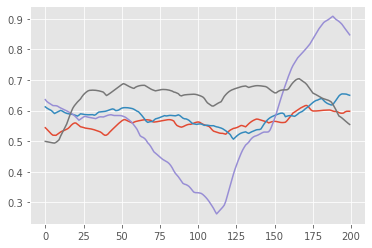

In [17]:
plt.plot(X_train[4,:,21]),plt.plot(X_train[0,:,23]),plt.plot(X_train[1000,:,65]),plt.plot(X_train[600,:,30])

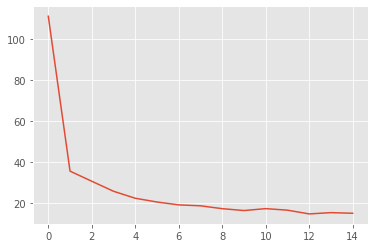

In [12]:
#np.sum(np.abs(model.predict(X_test) - y_test), axis=1)/3
plt.plot(model.history.history['loss'])

In [28]:
np.mean(np.abs(model.predict(X_test[:])-y_test[:]), axis=0)


array([3.17643158, 4.6857148 , 3.37822116])

In [26]:
np.max(y_test[:16], axis=0) - np.min(y_test[:16], axis=0)

array([65.52636719, 50.80499077, 58.12729645])

In [ ]:
del X_train, X_test, y_train, y_test

X, y = getData(2)
X.shape
for name in [3]:
    print(f'fetch data {str(name)}')
    X_, y_ = getData(name)
    X = np.append(X, X_, axis=0)
    y = np.append(y, y_, axis=0)

    del X_, y_

scaler = MinMaxScaler()
for i in range(len(X[0,0,:])):
    X[:,:,i] = scaler.fit_transform(X[:,:,i])

fetch data 3


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)
del X, y

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

model.fit(X_train, y_train, 
        epochs=64, 
        batch_size=256, 
        verbose=1, 
        callbacks=[es, mc],
        validation_data=(X_test, y_test))

In [29]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 200, 70)]         0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 198, 128)          27008     
_________________________________________________________________
batch_normalization_5 (Batch (None, 198, 128)          512       
_________________________________________________________________
activation_5 (Activation)    (None, 198, 128)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 196, 128)          49280     
_________________________________________________________________
batch_normalization_6 (Batch (None, 196, 128)          512       
_________________________________________________________________
activation_6 (Activation)    (None, 196, 128)          0   